In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
appl = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Analysis-with-Python/main/Data%20Analysis/Time%20Series%20Analysis/Date/AAPL.csv")
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400.0


In [24]:
appl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9941,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.959991,33843100.0
9942,2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400.0
9943,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200.0
9944,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200.0
9945,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20430600.0


<h2 align='center'>or</h2>

In [27]:
import pandas_datareader.data as web

In [28]:
df = web.DataReader('AAPL', 'yahoo', start='1980-12-12', end='2021-08-10')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100600
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095352
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088353
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090540
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093165


In [33]:
def moving_avarage_smoothing(X,k):
    S = np.zeros(X.shape[0])
    for t in range(X.shape[0]):
        if t < k:
            S[t] = np.mean(X[:t+1])
        else:
            S[t] = np.sum(X[t-k:t])/k
    return S

In [35]:
def exponential_smoothing(X,α):
    S = np.zeros(X.shape[0])
    S[0] = X[0]
    for t in range(1,X.shape[0]):
        S[t] = α * X[t-1] + (1- α) * S[t-1]
    return S

In [36]:
def double_exponential_smoothing(X,α,β):
    S,A,B = (np.zeros( X.shape[0] ) for i in range(3))
    S[0] = X[0]
    for t in range(1,X.shape[0]):
        A[t] = α * X[t] + (1- α) * S[t-1]
        B[t] = β * (A[t] - A[t-1]) + (1 - β) * B[t-1]
        S[t] = A[t] + B[t]
    return S

In [37]:
def triple_exponential_smoothing(X,L,α,β,γ,ϕ):
    
    def sig_ϕ(ϕ,m):
        return np.sum(np.array([np.power(ϕ,i) for i in range(m+1)]))
    
    
    C, S, B, F = (np.zeros( X.shape[0] ) for i in range(4))
    S[0], F[0] = X[0], X[0]
    B[0] = np.mean( X[L:2*L] - X[:L] ) / L
    m = 12
    sig_ϕ = sig_ϕ(ϕ,m)
    for t in range(1, X.shape[0]):
        S[t] = α * (X[t] - C[t % L]) + (1 - α) * (S[t-1] + ϕ * B[t-1])
        B[t] = β * (S[t] - S[t-1]) + (1-β) * ϕ * B[t-1]
        C[t % L] = γ * (X[t] - S[t]) + (1 - γ) * C[t % L]
        F[t] = S[t] + sig_ϕ * B[t] + C[t % L]
    return S

In [38]:
#smoothing techiniques
time_series = np.array(appl['High'])[5400:]
m_a_s = moving_avarage_smoothing(time_series,12)
e_s = exponential_smoothing(time_series,0.3)
d_e_s = double_exponential_smoothing(time_series,0.5,0.1)
t_e_s = triple_exponential_smoothing(time_series,12,0.1,0.1,0.1,0.5)

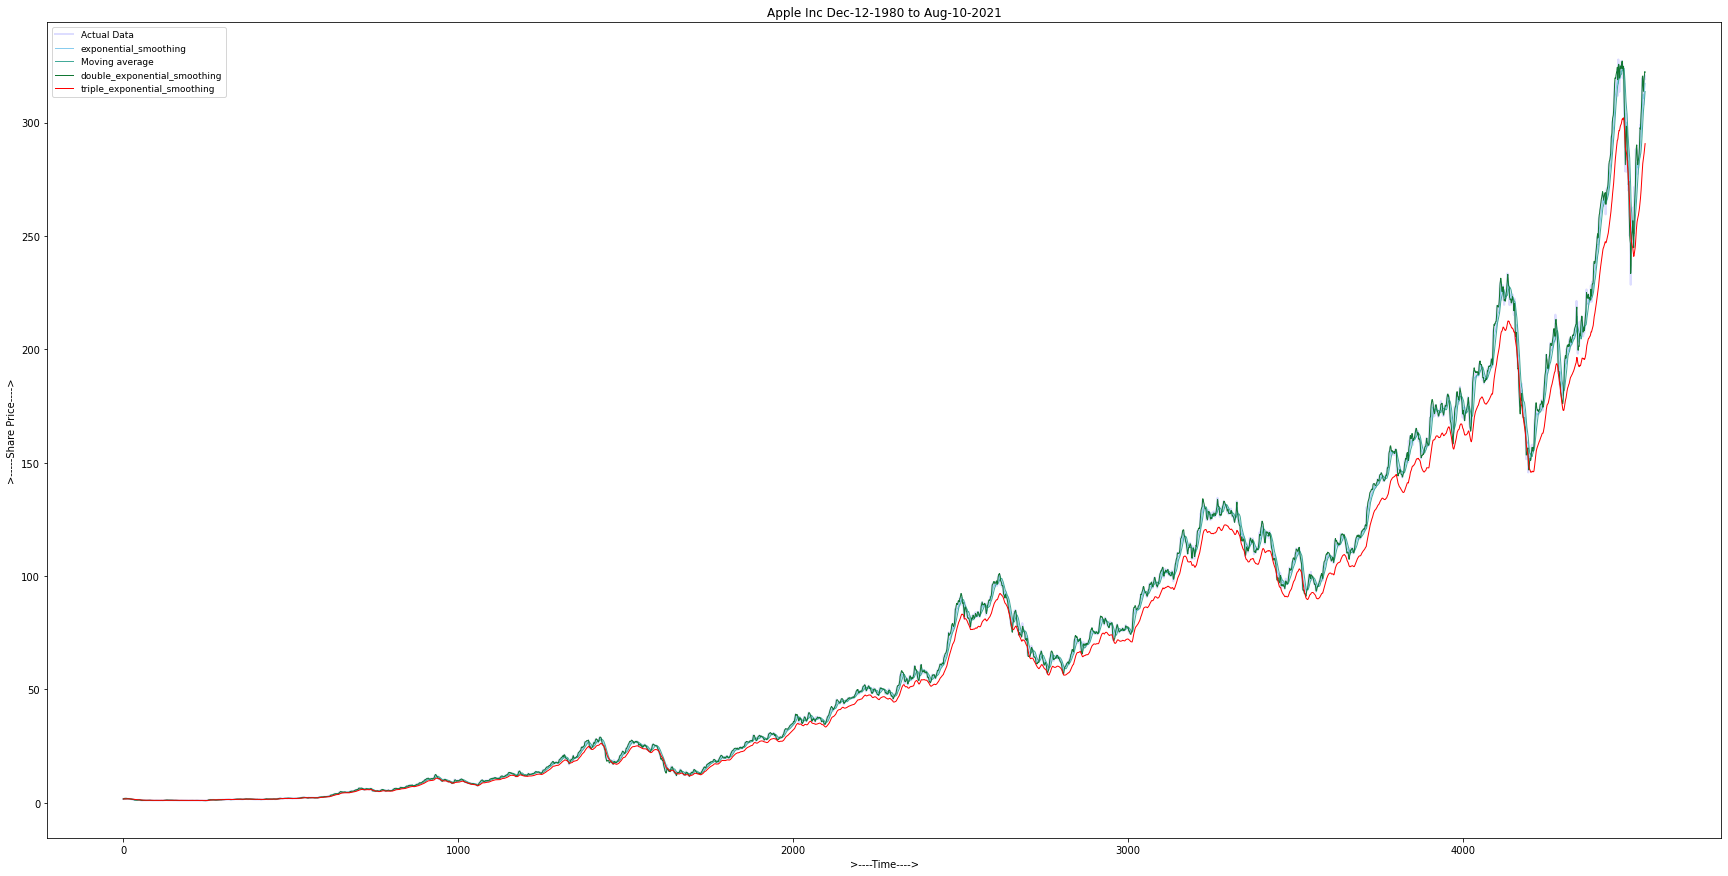

In [45]:
# plotting the Data 
fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(1,1,1)
ax = plt.gca()
ax.set_facecolor("#fff")


plt.title("Apple Inc Dec-12-1980 to Aug-10-2021")
plt.xlabel(">----Time---->")
plt.ylabel(">-----Share Price---->")


plt.plot(time_series,linewidth = 2, label='Actual Data',color='#ddf')
plt.plot(e_s,linewidth = 1, label='exponential_smoothing',color='#88CCEE')
plt.plot(m_a_s,linewidth = 1, label='Moving average',color='#44AA99')
plt.plot(d_e_s,linewidth=1,label="double_exponential_smoothing",color="#117733")
plt.plot(t_e_s,linewidth=1,label="triple_exponential_smoothing",color="red")


plt.legend(fontsize=9)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5f90ba1-3290-463e-8fc6-44108f4fa21b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>